Лабороторна робота 2.1 студента К. Д. Долматова

Варіант 3: Pima Indians Diabetes

Опис: Прогнозування наявності діабету у пацієнтів на основі медичних характеристик. Особливості набору даних: 8 ознак, два класи (наявність/відсутність діабету)


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.5 MB/s eta 0:00:00


In [ ]:
# Основні бібліотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Бібліотеки для машинного навчання
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# TensorFlow для створення нейронної мережі
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Gradio для інтерактивного інтерфейсу
import gradio as gr


In [ ]:
# Завантаження набору даних
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# Перевірка даних
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Розділення на вхідні дані та мітки
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Розділення на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормалізація ознак
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Створення моделі
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Компіляція моделі
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Навчання моделі
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5522 - loss: 0.7090 - val_accuracy: 0.5610 - val_loss: 0.7224
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6291 - loss: 0.6614 - val_accuracy: 0.5610 - val_loss: 0.6865
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6713 - loss: 0.6243 - val_accuracy: 0.6098 - val_loss: 0.6515
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7134 - loss: 0.5920 - val_accuracy: 0.6179 - val_loss: 0.6204
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7054 - loss: 0.5750 - val_accuracy: 0.6504 - val_loss: 0.5925
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7430 - loss: 0.5405 - val_accuracy: 0.6829 - val_loss: 0.5709
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7386 - loss: 0.5424 - val_accuracy: 0.6992 - val_loss: 0.5519
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7861 - loss: 0.4833 - val_accuracy: 0.7073 - val_l

In [ ]:
# Оцінка на тестових даних
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Точність на тестових даних: {test_accuracy:.2f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7463 - loss: 0.5522 
Точність на тестових даних: 0.75


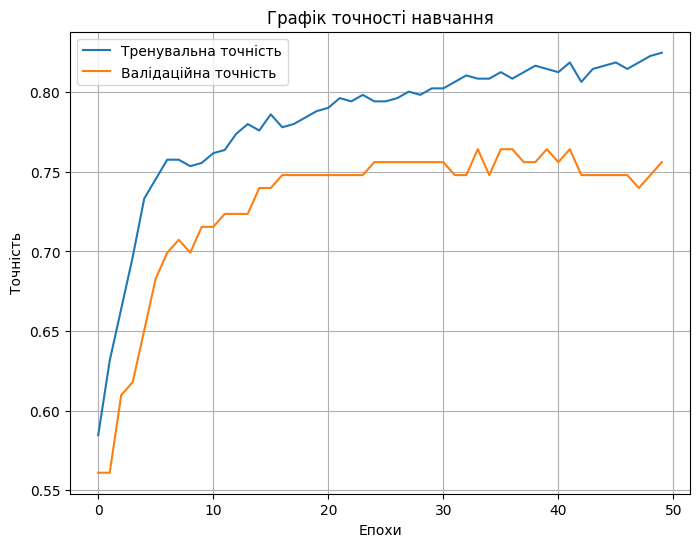

In [ ]:
# Візуалізація точності на тренувальних та валідаційних даних
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Тренувальна точність')
plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.title('Графік точності навчання')
plt.legend()
plt.grid(True)
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


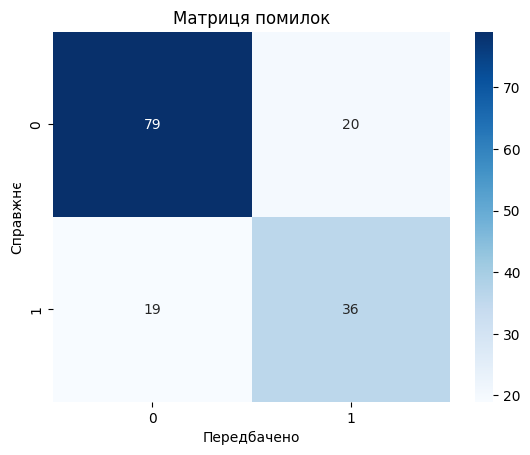

In [ ]:
# Передбачення
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Матриця помилок
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Передбачено')
plt.ylabel('Справжнє')
plt.title('Матриця помилок')
plt.show()


              precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



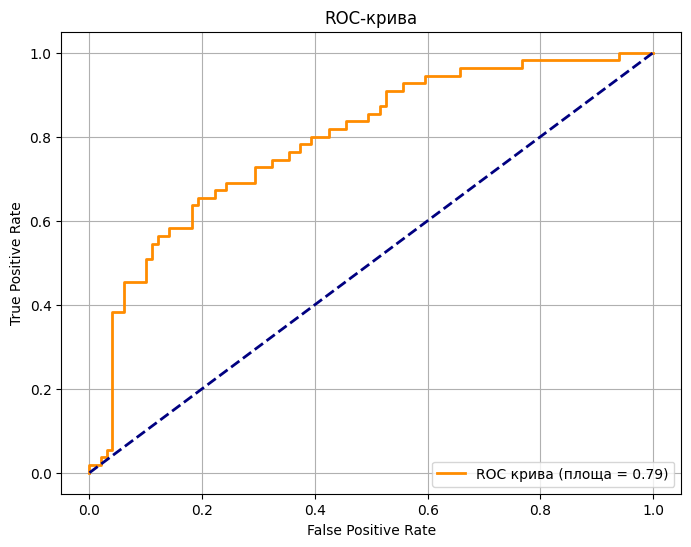

In [ ]:
# Класифікаційний звіт
print(classification_report(y_test, y_pred))

# Побудова ROC-кривої
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC крива (площа = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age):
    input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]])
    input_data = scaler.transform(input_data)
    prediction = model.predict(input_data)
    return "Діабет" if prediction[0][0] > 0.5 else "Немає діабету"

iface = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Number(label="Кількість вагітностей"),
        gr.Number(label="Рівень глюкози"),
        gr.Number(label="Тиск крові"),
        gr.Number(label="Товщина шкіри"),
        gr.Number(label="Рівень інсуліну"),
        gr.Number(label="Індекс маси тіла (BMI)"),
        gr.Number(label="Діабетичний родовідний функціональний індекс (DPF)"),
        gr.Number(label="Вік")
    ],
    outputs="text",
    title="Прогнозування наявності діабету",
    description="Введіть медичні показники для прогнозу наявності діабету."
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d2e2237f60361a42cb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
